<a href="https://colab.research.google.com/github/sisli7/youtube-search-/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from google.colab import files
import io
import pandas_datareader as web 


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [8]:
uploaded=files.upload()
df=pd.read_csv(io.BytesIO(uploaded['EURUSD(mr).csv']))
df 

Saving EURUSD(mr).csv to EURUSD(mr).csv


,Local time,Open,High,Low,Close,Volume
0,01.01.2020 00:00:00.000 GMT+0330,1.12158,1.12160,1.12157,1.12160,25.13
1,01.01.2020 00:01:00.000 GMT+0330,1.12160,1.12163,1.12160,1.12163,3.03
2,01.01.2020 00:02:00.000 GMT+0330,1.12161,1.12170,1.12160,1.12169,21.30
3,01.01.2020 00:03:00.000 GMT+0330,1.12170,1.12173,1.12169,1.12173,11.02
4,01.01.2020 00:04:00.000 GMT+0330,1.12171,1.12171,1.12170,1.12170,14.81
...,...,...,...,...,...,...
262015,30.06.2020 23:55:00.000 GMT+0430,1.12278,1.12286,1.12277,1.12286,37.09
262016,30.06.2020 23:56:00.000 GMT+0430,1.12285,1.12285,1.12271,1.12272,167.27
262017,30.06.2020 23:57:00.000 GMT+0430,1.12273,1.12286,1.12271,1.12282,85.87
262018,30.06.2020 23:58:00.000 GMT+0430,1.12285,1.12290,1.12281,1.12288,118.47


In [10]:
data=df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len


209616

In [11]:
#Scale the data 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data


array([[0.68378091],
       [0.68413581],
       [0.68484562],
       ...,
       [0.69821365],
       [0.69892346],
       [0.70046137]])

In [13]:
#creat the training data set 
#creat the scaled training data set

train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data set 
x_train=[]
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.68378091, 0.68413581, 0.68484562, 0.68531882, 0.68496392,
       0.68543712, 0.68638353, 0.68555542, 0.68543712, 0.68496392,
       0.68259789, 0.68437241, 0.6836626 , 0.68378091, 0.6831894 ,
       0.6830711 , 0.683426  , 0.683426  , 0.68378091, 0.6831894 ,
       0.6836626 , 0.6836626 , 0.6835443 , 0.6836626 , 0.6830711 ,
       0.6836626 , 0.68460901, 0.68401751, 0.68508222, 0.68543712,
       0.6836626 , 0.68236129, 0.68224299, 0.6829528 , 0.6827162 ,
       0.6828345 , 0.68224299, 0.6827162 , 0.68224299, 0.68153318,
       0.68165148, 0.68212469, 0.68212469, 0.68212469, 0.68236129,
       0.68176979, 0.68188809, 0.68236129, 0.68236129, 0.68165148,
       0.68153318, 0.68141488, 0.68129658, 0.68141488, 0.68117828,
       0.68141488, 0.68212469, 0.68236129, 0.68165148, 0.68176979])]
[0.6816514846799979]

[array([0.68378091, 0.68413581, 0.68484562, 0.68531882, 0.68496392,
       0.68543712, 0.68638353, 0.68555542, 0.68543712, 0.68496392,
       0.68259789, 0.68437241, 0.683

In [14]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(209556, 60, 1)

In [16]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

209556/209556 [==============================] - 3893s 19ms/step - loss: 3.5733e-05


In [18]:
#creat the testing data set 
#crerat a new array containinng scaled values from index 1543 to 2003 
test_data = scaled_data[training_data_len - 60: , :]
#creat the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i , 0])
  

In [19]:
#Convert the data to a numpy array 
x_test=np.array(x_test)

In [20]:
#Reshape the data 
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [21]:
# get the models predicted price values 
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#get the root mean  squared error (RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.00015089960867700262

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


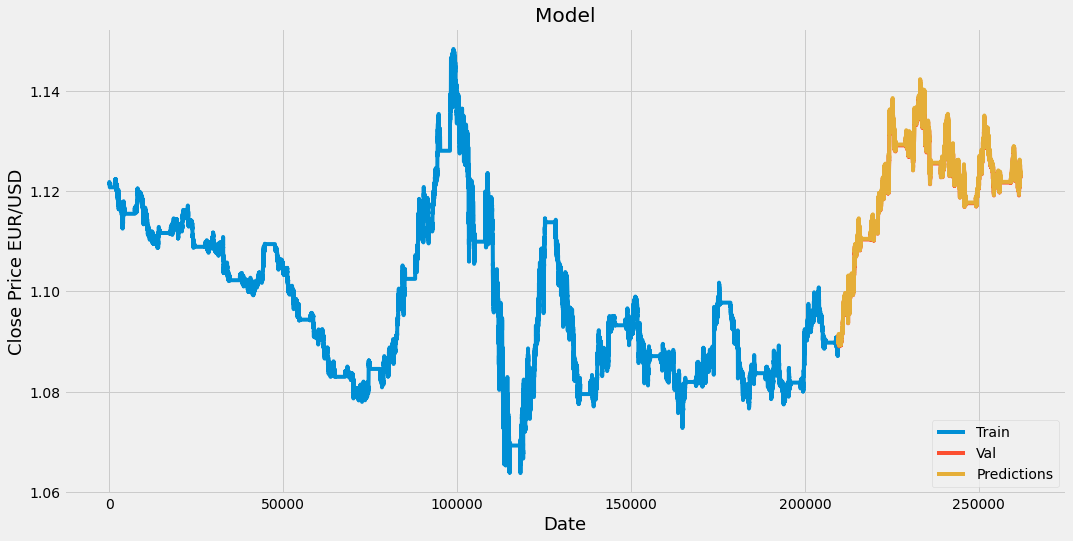

In [ ]:
#plot the data 
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price EUR/USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid 
valid

,Close,Predictions
209616,1.09005,1.090326
209617,1.09004,1.090155
209618,1.09011,1.090130
209619,1.09008,1.090222
209620,1.09009,1.090215
...,...,...
262015,1.12286,1.122918
262016,1.12272,1.123007
262017,1.12282,1.122872
262018,1.12288,1.122953


In [5]:
#get the code
uploaded=files.upload()
new_df=pd.read_csv(io.BytesIO(uploaded['EURUSD.csv']))


stock_forex=new_df.filter(['BidClose'])
#get the last 60 day closing price values and convert  the dataframe to an array 

last_60_days=stock_forex[-60:].values




Saving EURUSD.csv to EURUSD (2).csv


In [23]:
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[1.0641031]]
